In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../../../')
import utils

In [2]:
CALIBRATION_FILE = '../../../calibration/out/C.mat'
DATA_FILE = '../../../experiment_data/blue_feet/6/2016.10.08_21.17.48_trial_imudata.txt'

In [3]:
utils.print_header(DATA_FILE)

%  Data file recorded 2016/10/8  21:17:48
%  Stride Frequency         = [1, 1]
%  Lead In /Lead Out        = 
%  Deltas (Fractional)      = [0.25, 0.25, 0.25],[0.25, 0.25, 0.25]
%  Phase                    = 32768
%  Experiment.py 
%  Motor Gains    = [5000, 400, 200, 0, 300, 5000, 400, 200, 0, 300]



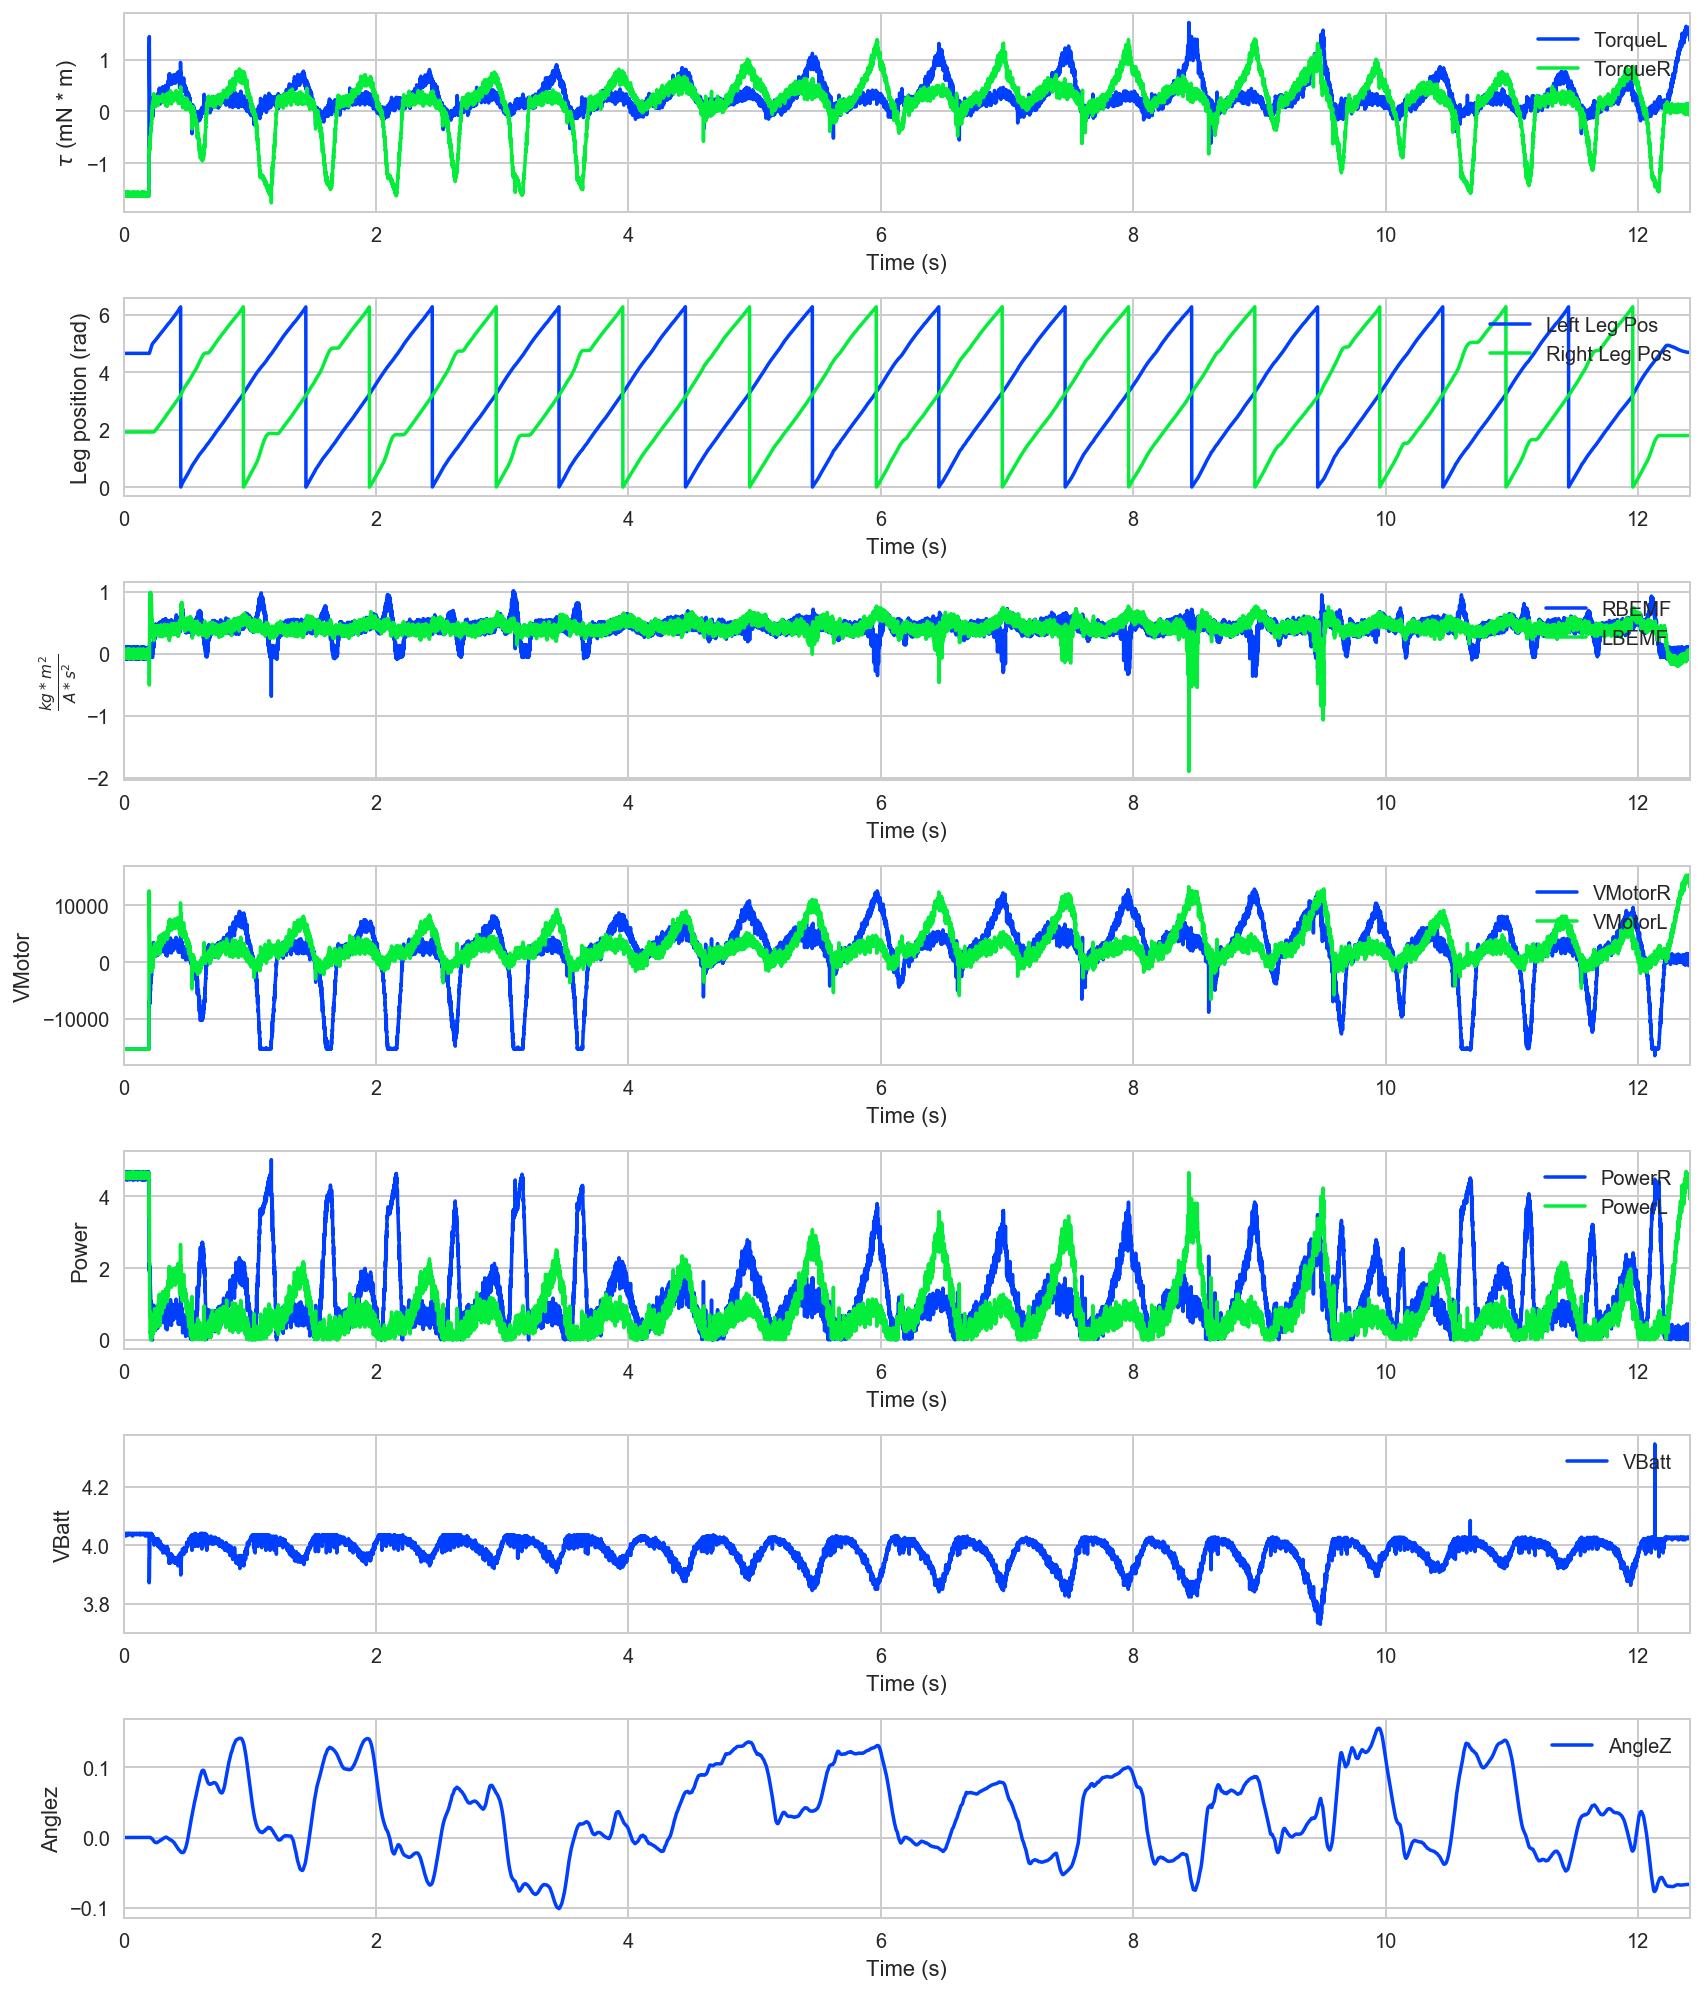

In [4]:
df = utils.process_data_files(DATA_FILE, CALIBRATION_FILE)
utils.plot_columns(df, [['TorqueL', 'TorqueR'], ['Left Leg Pos', 'Right Leg Pos'], ['RBEMF', 'LBEMF'], ['VMotorR', 'VMotorL'], ['PowerR', 'PowerL'], 'VBatt', 'AngleZ'], display=True, save_figure=False)

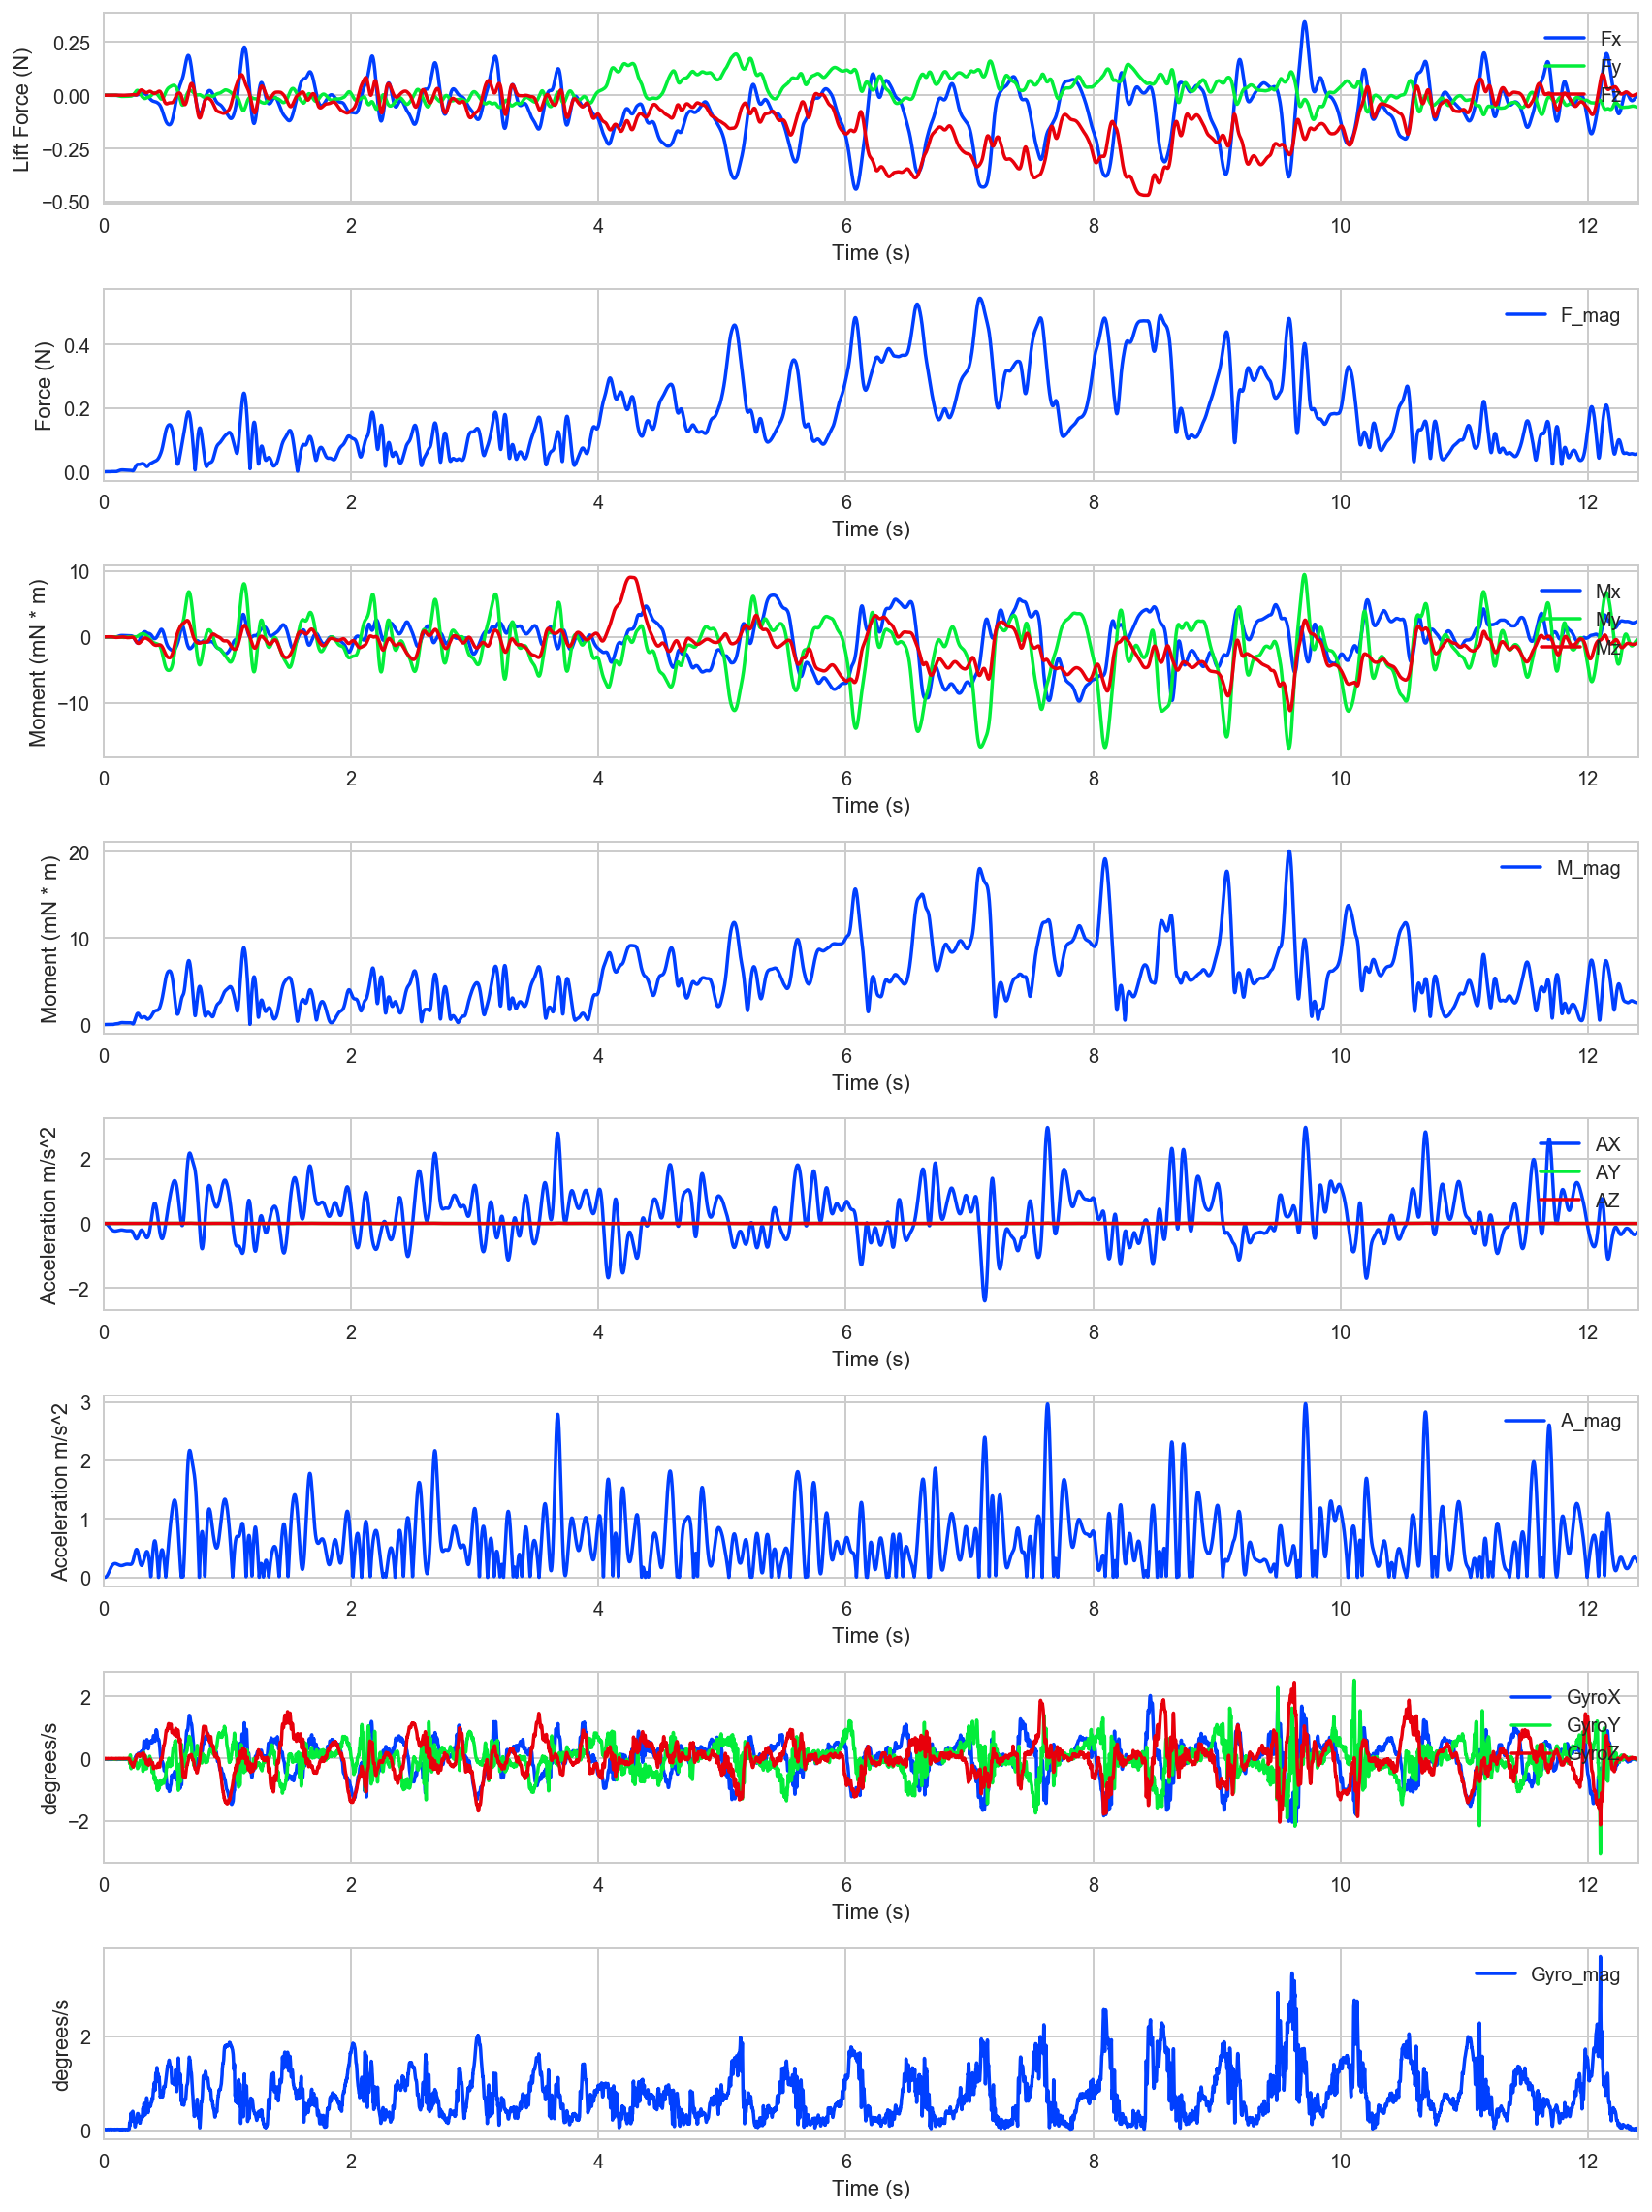

In [5]:
utils.plot_columns(df, [['Fx', 'Fy', 'Fz'], 'F_mag', ['Mx', 'My', 'Mz'], 'M_mag', ['AX', 'AY', 'AZ'], 'A_mag', ['GyroX', 'GyroY', 'GyroZ'], 'Gyro_mag'], display=True, save_figure=False)

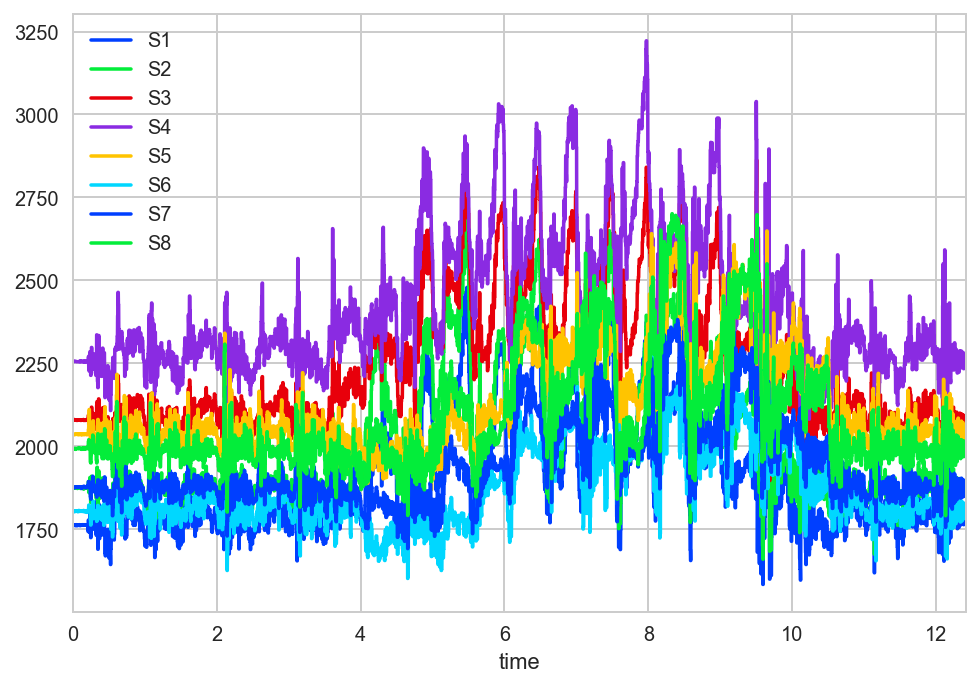

In [6]:
df.plot(x='time', y=['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8'])

In [7]:
print "Here is the cost of transport for inside flaps"
cot = utils.cost_of_transport_inside_flaps(df, has_bottom_shell=False, v_avg=6.35/100.,
                                           start_time=7000, end_time=11000, same_power_across_experiments=0)
print cot
     
    

Here is the cost of transport for inside flaps
power:2.09782384288
45.9590075208


In [8]:
drag = utils.calculate_drag_energy(df, has_bottom_shell=False,start_time=7000,end_time=11000)
print drag

drag energy (kg*cm^2/s^2): 171.934198813
0.0171934198813


In [9]:
electrical_energy = utils.calculate_electrical_energy(df, start_time=7000, end_time=11000)

electrical energy (Joules): 8.39129537153


In [13]:
import numpy as np
start = df['Right Leg Pos'][7000:7500].argmax()
end = df['Right Leg Pos'][11000:11500].argmax()
print start, end
print df['Right Leg Pos'][start]
print df['Right Leg Pos'][end]
starts = np.arange(start, end, step=1000)
ends = np.arange(start+1000, end+1000, step=1000)
intervals = np.vstack((starts, ends)).T
print intervals

7499 11499
3.56036973452
3.6052388714
[[ 7499  8499]
 [ 8499  9499]
 [ 9499 10499]
 [10499 11499]]


In [14]:
drags = utils.get_drag_energy_from_list(df, False, intervals)
print drags

drag energy (kg*cm^2/s^2): 53.8914857483
drag energy (kg*cm^2/s^2): 37.4633267525
drag energy (kg*cm^2/s^2): 34.9300430545
drag energy (kg*cm^2/s^2): 13.0338877448
[0.005389148574830358, 0.003746332675245167, 0.0034930043054507, 0.0013033887744774808]
